In [60]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline



In [61]:
# Set the file paths
whale_returns = Path("whale_returns.csv")
algo_returns = Path("algo_returns.csv")
sp500_history = Path("sp500_history.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
whale_returns_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)


### Whale Returns
Read the Whale Portfolio daily returns and clean the data

In [62]:
# Reading whale returns
whale_returns_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [63]:
# Count nulls
whale_returns_df.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [64]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

#Verify that all nulls have been dropped
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

### Algorithmic Daily Returns
Read the algorithmic daily returns and clean the data

In [65]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [66]:
# Count nulls
algo_returns_df.isnull().count()



Algo 1    1241
Algo 2    1241
dtype: int64

In [67]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

#verify all NAs have been dropped

algo_returns_df.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

### S&P 500 Returns
Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.

In [68]:
# Reading S&P 500 Closing Prices
sp500_history_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)



In [69]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [70]:
# Fix Data Types
sp500_history_df.isnull().count()

sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")


C:\Users\Brian\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [71]:
# Calculate Daily Returns



sp500_daily_ret = sp500_history_df.pct_change()

In [72]:
# Drop nulls

sp500_daily_ret.dropna()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [73]:
# Rename `Close` Column to be specific to this portfolio.

sp500_daily_ret.rename(columns = {"Close" : "SP500"}, inplace=True)

### Combine Whale, Algorithmic, and S&P 500 Returns

In [110]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([sp500_daily_ret, algo_returns_df, whale_returns_df], axis="columns", join="inner")
combined_df.head()

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-23,NaN,0.004969,0.009622,0.007167,0.003485,0.006472,0.013278
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837


## Conduct Quantitative Analysis
In this section, you will calculate and visualize performance and risk metrics for the portfolios.

### Performance Anlysis
Calculate and Plot the daily returns.

In [112]:
# Plot daily returns of all portfolios

daily_returns = combined_df.pct_change()
daily_returns = daily_returns.dropna()
daily_returns.head()

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-18,-0.884637,-1.868976,-0.364991,-1.559965,-1.166626,-1.159757,-2.761467
2019-04-17,0.559400,16.521245,3.253330,-3.000629,-6.293097,-8.582317,0.681647
2019-04-16,-2.445510,-0.325825,-1.554579,-1.931873,-1.060020,-0.811553,-0.740329
2019-04-15,-1.223394,-0.376322,-2.576745,-1.526776,-3.978912,-1.478853,-13.540137
2019-04-12,-2.237116,0.270048,-1.985300,-4.982373,0.007401,9.597921,-1.697235


 Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

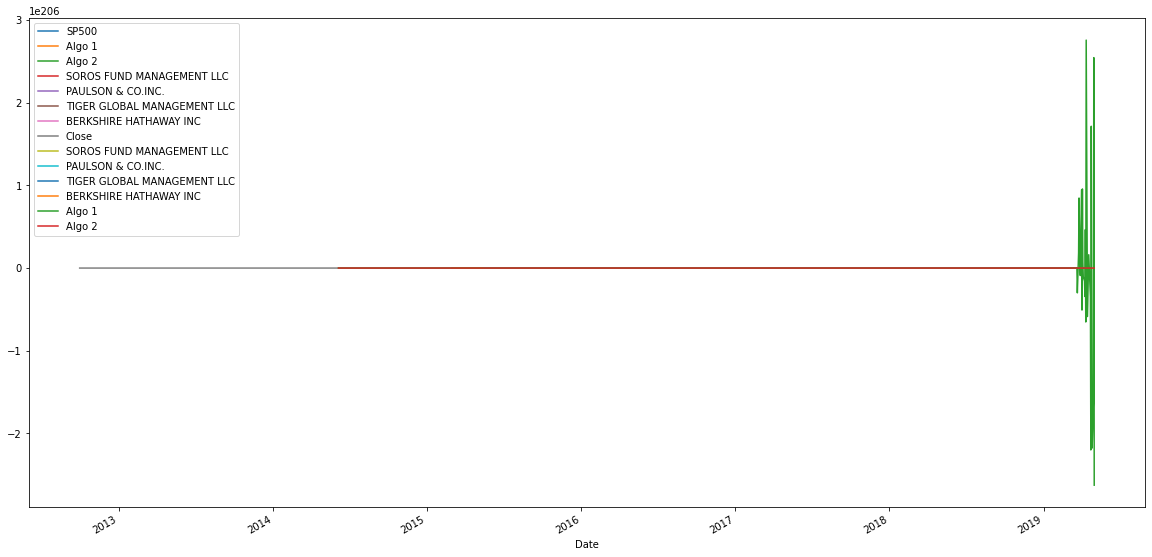

In [113]:
# Calculate cumulative returns of all portfolios

daily_returns_cumprod = combined_df.cumprod()

# Plot cumulative returns
ax = daily_returns_cumprod.plot(figsize=(20,10))
sp500_cum_prod.plot(ax=ax)
whale_cum_prod.plot(ax=ax)
algo_cum_prod.plot(ax=ax)

## Risk Analysis
Determine the risk of each portfolio:

1. Create a box plot for each portfolio.
2. Calculate the standard deviation for all portfolios
3. Determine which portfolios are riskier than the S&P 500
4. Calculate the Annualized Standard Deviation



### Create a box plot for each portfolio

<AxesSubplot:>

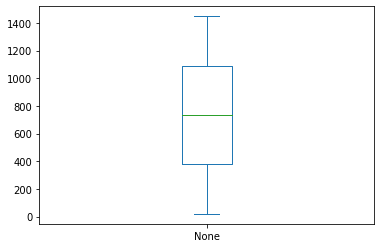

In [118]:
# Box plot to visually show risk
daily_std = daily_returns.std()
daily_std = daily_std.sort_values(ascending=False)
daily_std.plot.box()

### Calculate Standard Deviations

In [120]:
# Calculate the daily standard deviations of all portfolios

daily_std = daily_returns.std()
daily_std = daily_std.dropna()
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()


Algo 2    1447.968543
Algo 1      19.361687
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [121]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_daily_returns.std()
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_returns.std()
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()


Algo 2                       1447.968543
Algo 1                         19.361687
SP500                                NaN
SOROS FUND MANAGEMENT LLC            NaN
PAULSON & CO.INC.                    NaN
dtype: float64

### Calculate the Annualized Standard Deviation

In [122]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)

annualized_std.head()

Algo 2                       22985.788026
Algo 1                         307.357252
SP500                                 NaN
SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
dtype: float64

## Rolling Statistics
Risk changes over time. Analyze the rolling statistics for Risk and Beta.

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling std for all portfolios with 21-day window

In [123]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
port_sma_21 = combined_df.rolling(window=21).mean()
# Plot the rolling standard deviation
port_sma_21

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2015-03-09,-0.000021,0.001257,0.000801,0.001330,0.000988,0.001077,0.000783
2015-03-06,-0.000080,0.000926,0.000379,0.001013,0.000826,0.000771,0.000070
2015-03-05,0.000506,0.001037,0.000282,0.000948,0.000841,0.000663,0.000156


### Calculate and plot the correlation

<AxesSubplot:>

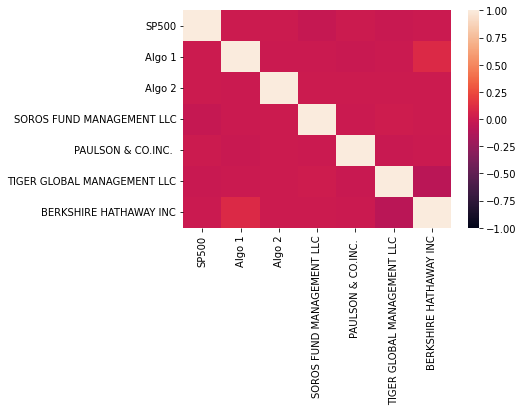

In [52]:
# Calculate the correlation
correlation = daily_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'60 day rolling beta for Tiger Global Management LLC'}, xlabel='Date'>

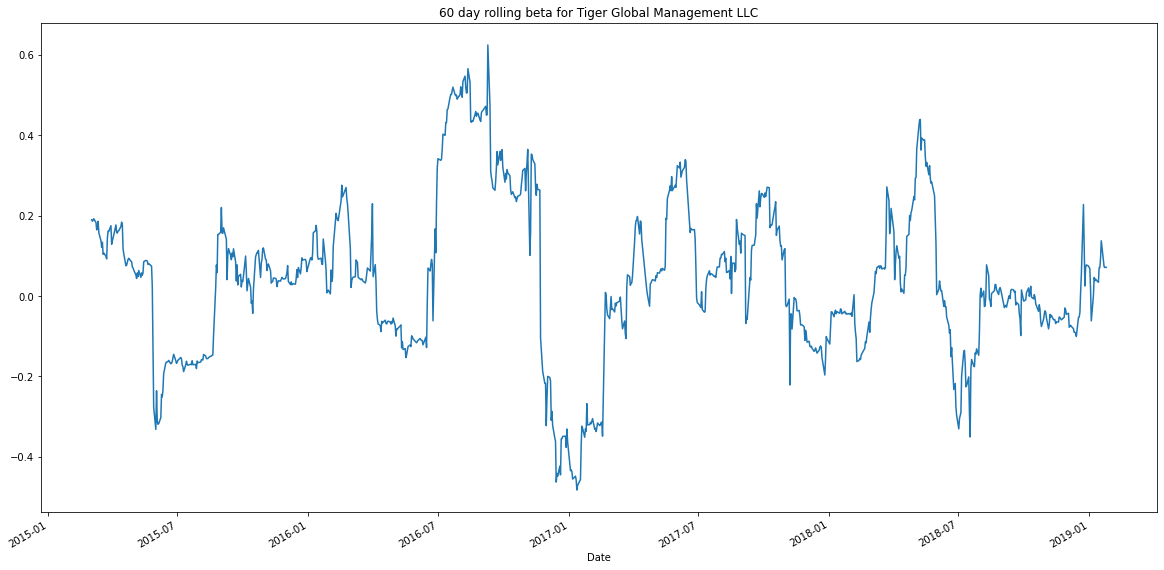

In [58]:
# Calculate covariance of a single portfolio
covar = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(60).cov(combined_df['SP500'])

# Calculate variance of S&P 500
sp500_var = combined_df['SP500'].rolling(60).var()

# Computing beta
beta = covar / sp500_var

# Plot beta trend
beta.plot(figsize = (20,10), title = '60 day rolling beta for Tiger Global Management LLC')



### Rolling Statistics Challenge: Exponentially Weighted Average
An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21-day half-life.

In [54]:
# Use `ewm` to calculate the rolling window



## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [59]:
# Annualized Sharpe Ratios
sharpe = (combined_df.mean()*252) / (annualized_std)
sharpe

Algo 1                         0.000546
Algo 2                         0.000003
BERKSHIRE HATHAWAY INC              NaN
PAULSON & CO.INC.                   NaN
SOROS FUND MANAGEMENT LLC           NaN
SP500                               NaN
TIGER GLOBAL MANAGEMENT LLC         NaN
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

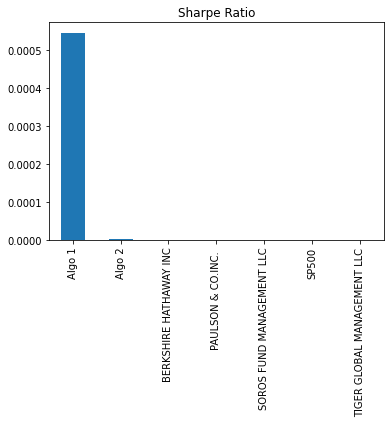

In [81]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot(kind = 'bar', title = "Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
From the chart above, Algo 1 out performed both the market and whales portfolio

## Create Custom Portfolio
In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500.

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## 1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [89]:

tsla_csv = Path("tsla.csv")
gs_csv = Path("gs.csv")
sofi_csv = Path("sofi.csv")

tsla_df = pd.read_csv(tsla_csv, index_col = 'Date', infer_datetime_format=True, parse_dates=True)
tsla_df = tsla_df.sort_index()

gs_df = pd.read_csv(gs_csv, index_col = 'Date', infer_datetime_format=True, parse_dates=True)
gs_df = gs_df.sort_index()

sofi_df = pd.read_csv(sofi_csv, index_col = 'Date', infer_datetime_format=True, parse_dates=True)
sofi_df = sofi_df.sort_index()



In [93]:
##combine into one dataframe

stock_picks = pd.concat([tsla_df, gs_df, sofi_df], axis = 'rows', join='inner')
my_port = stock_picks.pivot_table(values = 'Close', index = 'Date', columns = 'Symbol')
my_port

Symbol,GS,SOFI,TSLA
Date,,,
2021-01-04 16:00:00,265.00,12.20,729.77
2021-01-05 16:00:00,270.93,12.15,735.11
2021-01-06 16:00:00,285.55,12.12,755.98
2021-01-07 16:00:00,291.65,19.14,816.04
2021-01-08 16:00:00,290.08,18.74,880.02
...,...,...,...
2021-12-27 16:00:00,388.04,15.39,1093.94
2021-12-28 16:00:00,387.61,14.85,1088.47
2021-12-29 16:00:00,386.20,14.47,1086.19


In [96]:
#daily returns
my_daily_ret = my_port.pct_change()

#drop NA
my_daily_ret = my_daily_ret.dropna()

#display sample data

my_daily_ret

Symbol,GS,SOFI,TSLA
Date,,,
2021-01-05 16:00:00,0.022377,-0.004098,0.007317
2021-01-06 16:00:00,0.053962,-0.002469,0.028390
2021-01-07 16:00:00,0.021362,0.579208,0.079447
2021-01-08 16:00:00,-0.005383,-0.020899,0.078403
2021-01-11 16:00:00,0.012927,0.013340,-0.078214
...,...,...,...
2021-12-27 16:00:00,0.007791,0.019881,0.025248
2021-12-28 16:00:00,-0.001108,-0.035088,-0.005000
2021-12-29 16:00:00,-0.003638,-0.025589,-0.002095


## 2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [125]:
#set equal shares
shares = [1/3, 1/3, 1/3] 

#portfolio returns
my_port_returns = my_daily_ret.dot(shares)

#display

my_port_returns

Date
2021-01-05 16:00:00    0.008532
2021-01-06 16:00:00    0.026628
2021-01-07 16:00:00    0.226672
2021-01-08 16:00:00    0.017374
2021-01-11 16:00:00   -0.017315
                         ...   
2021-12-27 16:00:00    0.017640
2021-12-28 16:00:00   -0.013732
2021-12-29 16:00:00   -0.010441
2021-12-30 16:00:00    0.028643
2021-12-31 16:00:00   -0.009717
Length: 251, dtype: float64

## 3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [129]:
# Join your returns DataFrame to the original returns DataFrame
combined_df["My Returns"] = my_port_returns


# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df 

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,My Port Returns,My Returns
Date,,,,,,,,,
2019-04-23,NaN,0.004969,0.009622,0.007167,0.003485,0.006472,0.013278,NaN,NaN
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088,NaN,NaN
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,NaN,NaN
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,NaN,NaN
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2015-03-09,0.017254,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,NaN,NaN
2015-03-06,-0.003929,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,NaN,NaN
2015-03-05,0.014378,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,NaN,NaN


## 4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [128]:
my_ann_std = combined_df.std() * np.sqrt(252)
my_ann_std

SP500                          0.136313
Algo 1                         0.120967
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
My Port Returns                     NaN
dtype: float64

### Calculate and plot rolling std with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD w/ my picks'}, xlabel='Date'>

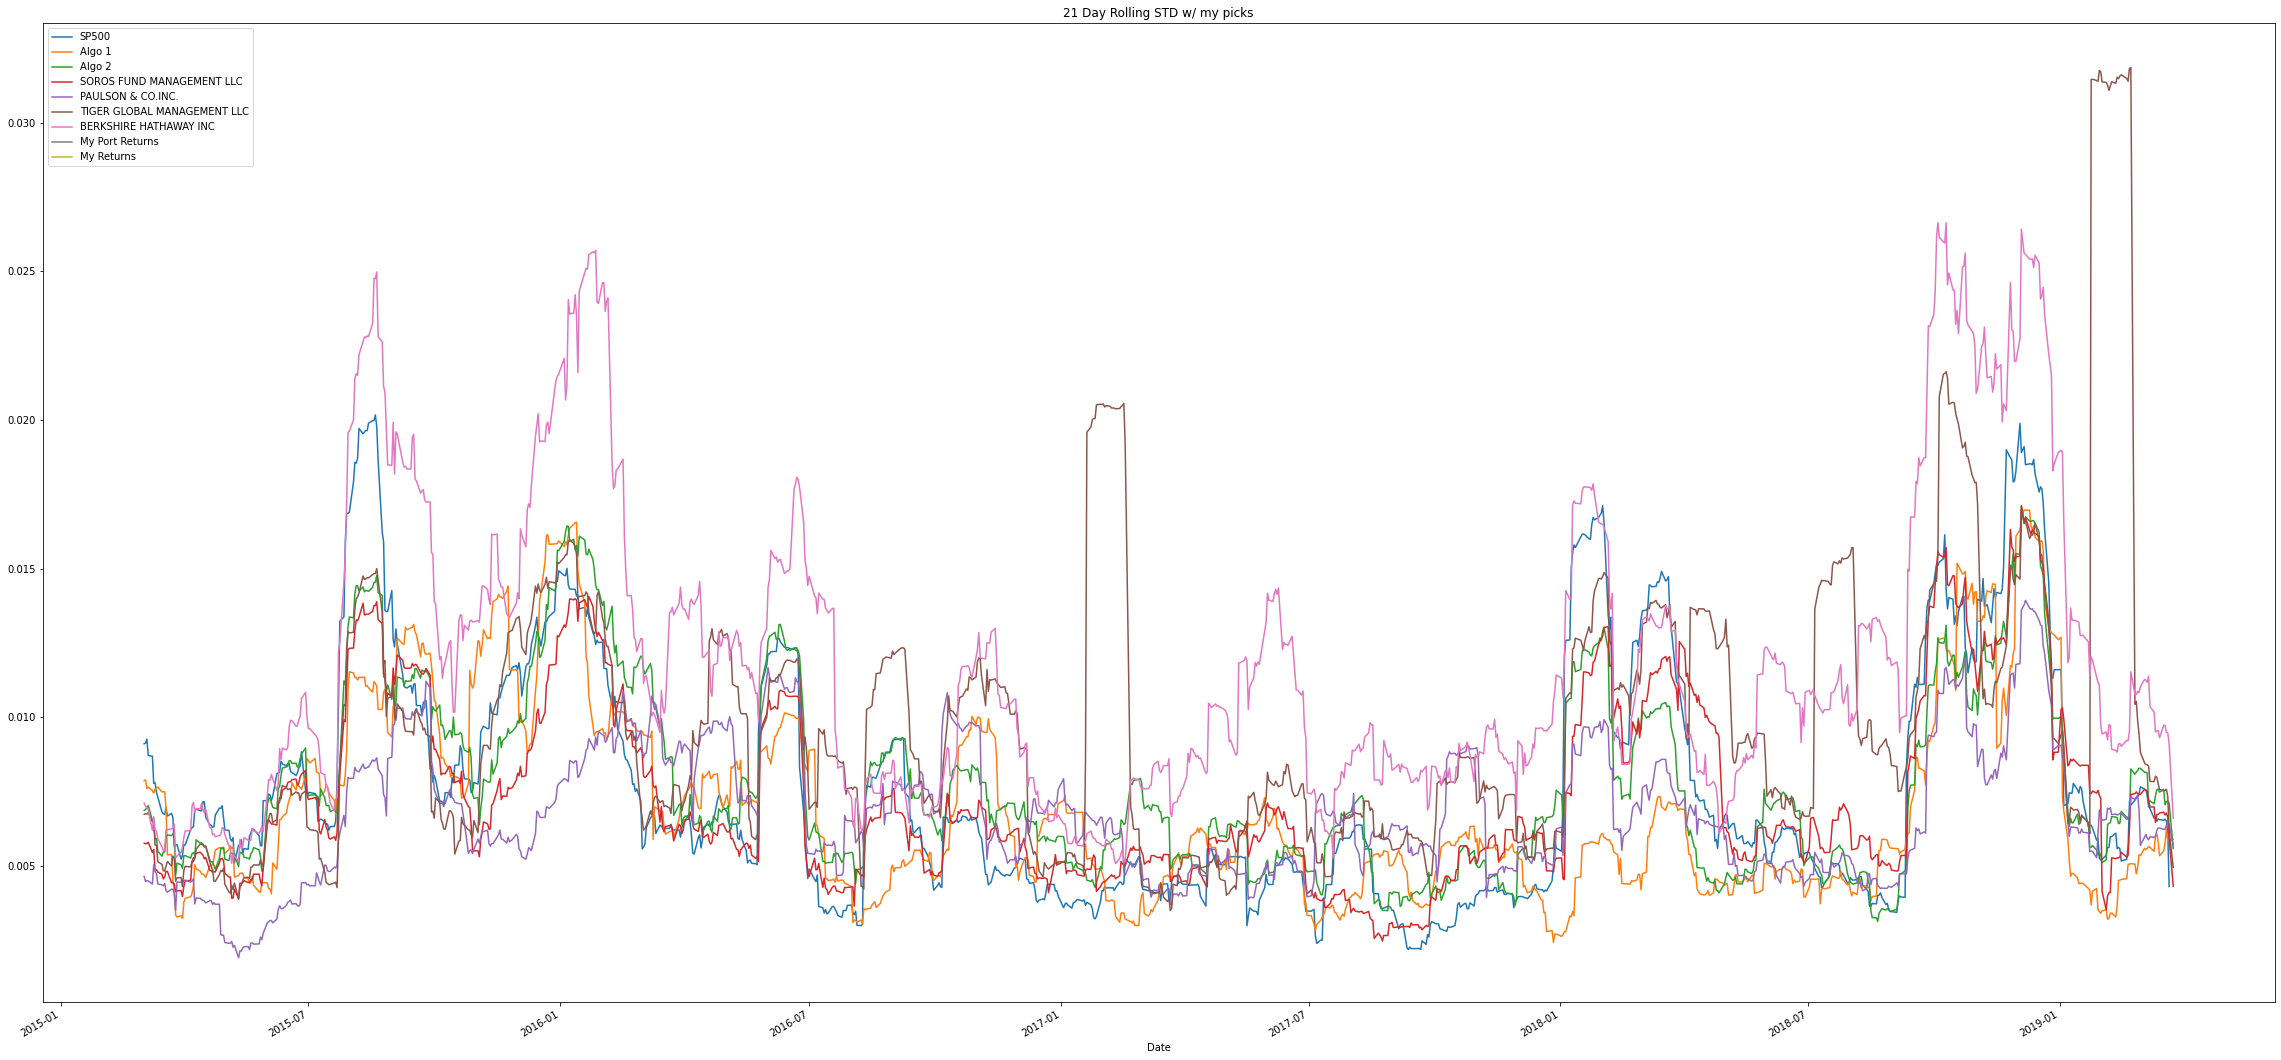

In [130]:
# Calculate rolling standard deviation
my_rolling_std = combined_df.rolling(21).std()

# Plot rolling standard deviation
my_rolling_std.plot(figsize = (40,20), title = "21 Day Rolling STD w/ my picks")

### Calculate and plot the correlation

<AxesSubplot:xlabel='Symbol', ylabel='Symbol'>

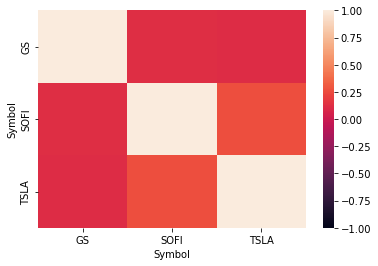

In [134]:
# Calculate the correlation
corr = my_daily_ret.corr()
# Display de correlation matrix
sns.heatmap(corr, vmin=-1, vmax=1)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60 day rolling beta for My Port'}, xlabel='Date'>

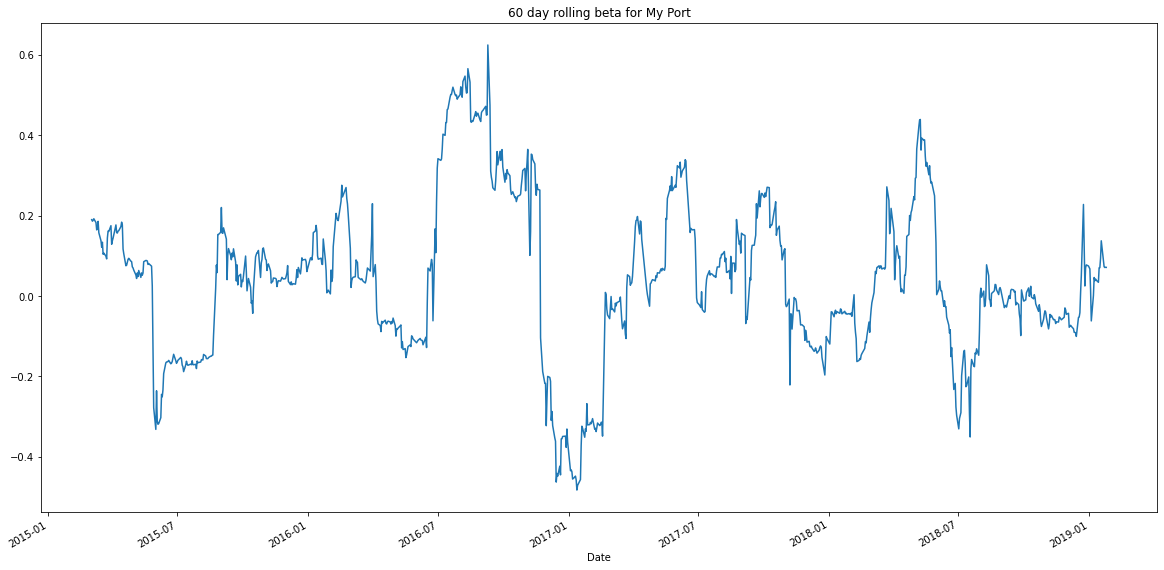

In [136]:
# Calculate and plot Beta
# find covariance
my_covar = combined_df["My Port Returns"].rolling(60).cov(combined_df["SP500"])
# find SP500 variance
my_var = combined_df["SP500"].rolling(60).var()
#define beta
my_beta = (my_covar / my_var)

beta.plot(figsize = (20,10), title = '60 day rolling beta for My Port')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<AxesSubplot:title={'center':'My Sharpe Ratios'}>

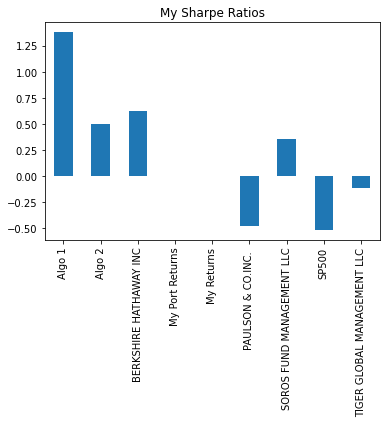

In [138]:
# Calculate Annualized Sharpe Ratios

my_sharpe = (combined_df.mean() * 252) / (my_ann_std)
# Visualize the sharpe ratios as a bar plot
my_sharpe.plot(kind = 'bar', title = 'My Sharpe Ratios')


## How does your portfolio do?